In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# Ruta a las bandas de una imagen Sentinel-2 L2A
ruta_b4 = 'B04_10m.jp2'
ruta_b8 = 'B08_10m.jp2'

# Abrir las bandas
with rasterio.open(ruta_b4) as src_red:
    red = src_red.read(1).astype('float32')
    perfil = src_red.profile
    nodata = src_red.nodata

with rasterio.open(ruta_b8) as src_nir:
    nir = src_nir.read(1).astype('float32')

# Manejo de nodata y cálculo del NDVI
ndvi = np.where(
    (nir + red) == 0,
    np.nan,
    (nir - red) / (nir + red)
)

# Actualizar el perfil para guardar el NDVI
perfil.update(dtype='float32', count=1, nodata=np.nan)



C:\Users\Asus\AppData\Local\Temp\ipykernel_10796\3977994192.py:23: RuntimeWarning: invalid value encountered in divide
  (nir - red) / (nir + red)


C:\Users\Asus\AppData\Local\Temp\ipykernel_10796\2624198878.py:2: RuntimeWarning: invalid value encountered in cast
  ndvi_scaled = ((ndvi + 1) * 10000).astype('uint16')  # NDVI [-1,1] → [0, 20000]


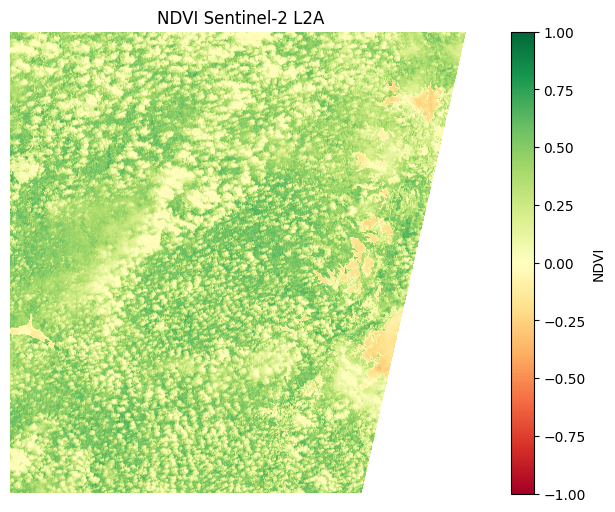

In [5]:
# Guardar NDVI como GeoTIFF
ndvi_scaled = ((ndvi + 1) * 10000).astype('uint16')  # NDVI [-1,1] → [0, 20000]
perfil.update(dtype='uint16', count=1)

with rasterio.open('NDVI.jp2', 'w', **perfil) as dst:
    dst.write(ndvi_scaled, 1)

# Visualización
plt.figure(figsize=(10, 6))
ndvi_plot = plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(ndvi_plot, label='NDVI')
plt.title('NDVI Sentinel-2 L2A')
plt.axis('off')
plt.show()
